In [1]:
#import the nececassary libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load tha data into pandas
df = pd.read_csv('.\\telco-customer-churn\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# take a look at the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# take a look at the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
# Display a profile for our data
pp.ProfileReport(df)

Number of variables,21
Number of observations,7043
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,17
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [6]:
# Convert TotalCharges to numeric and SeniorCitizen to categorical
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')
df['SeniorCitizen'] = df.SeniorCitizen.map({0: 'No', 1: 'Yes'},na_action='ignore')
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [7]:
# create a fcuntion to find and display NAs
def count_NAs(dfna):
    NaList = []
    numOfRows = len(dfna)
    for i in dfna.columns:
        numOfNAs = dfna[i].isna().sum()
        print(f'{i:<30}, Rows: {numOfRows:>5}, NAs: {numOfNAs:<25}, precentage: {numOfNAs/numOfRows * 100.000}')
        if numOfNAs != 0:
           NaList.append(i)
    print(f'columns with NAs : {NaList}')
    return NaList

In [8]:
# Display NAs
NAs = count_NAs(df)

customerID                    , Rows:  7043, NAs: 0                        , precentage: 0.0
gender                        , Rows:  7043, NAs: 0                        , precentage: 0.0
SeniorCitizen                 , Rows:  7043, NAs: 0                        , precentage: 0.0
Partner                       , Rows:  7043, NAs: 0                        , precentage: 0.0
Dependents                    , Rows:  7043, NAs: 0                        , precentage: 0.0
tenure                        , Rows:  7043, NAs: 0                        , precentage: 0.0
PhoneService                  , Rows:  7043, NAs: 0                        , precentage: 0.0
MultipleLines                 , Rows:  7043, NAs: 0                        , precentage: 0.0
InternetService               , Rows:  7043, NAs: 0                        , precentage: 0.0
OnlineSecurity                , Rows:  7043, NAs: 0                        , precentage: 0.0
OnlineBackup                  , Rows:  7043, NAs: 0                   

In [9]:
# Drop rows containing nulls
df = df.dropna()

# Visuals

C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


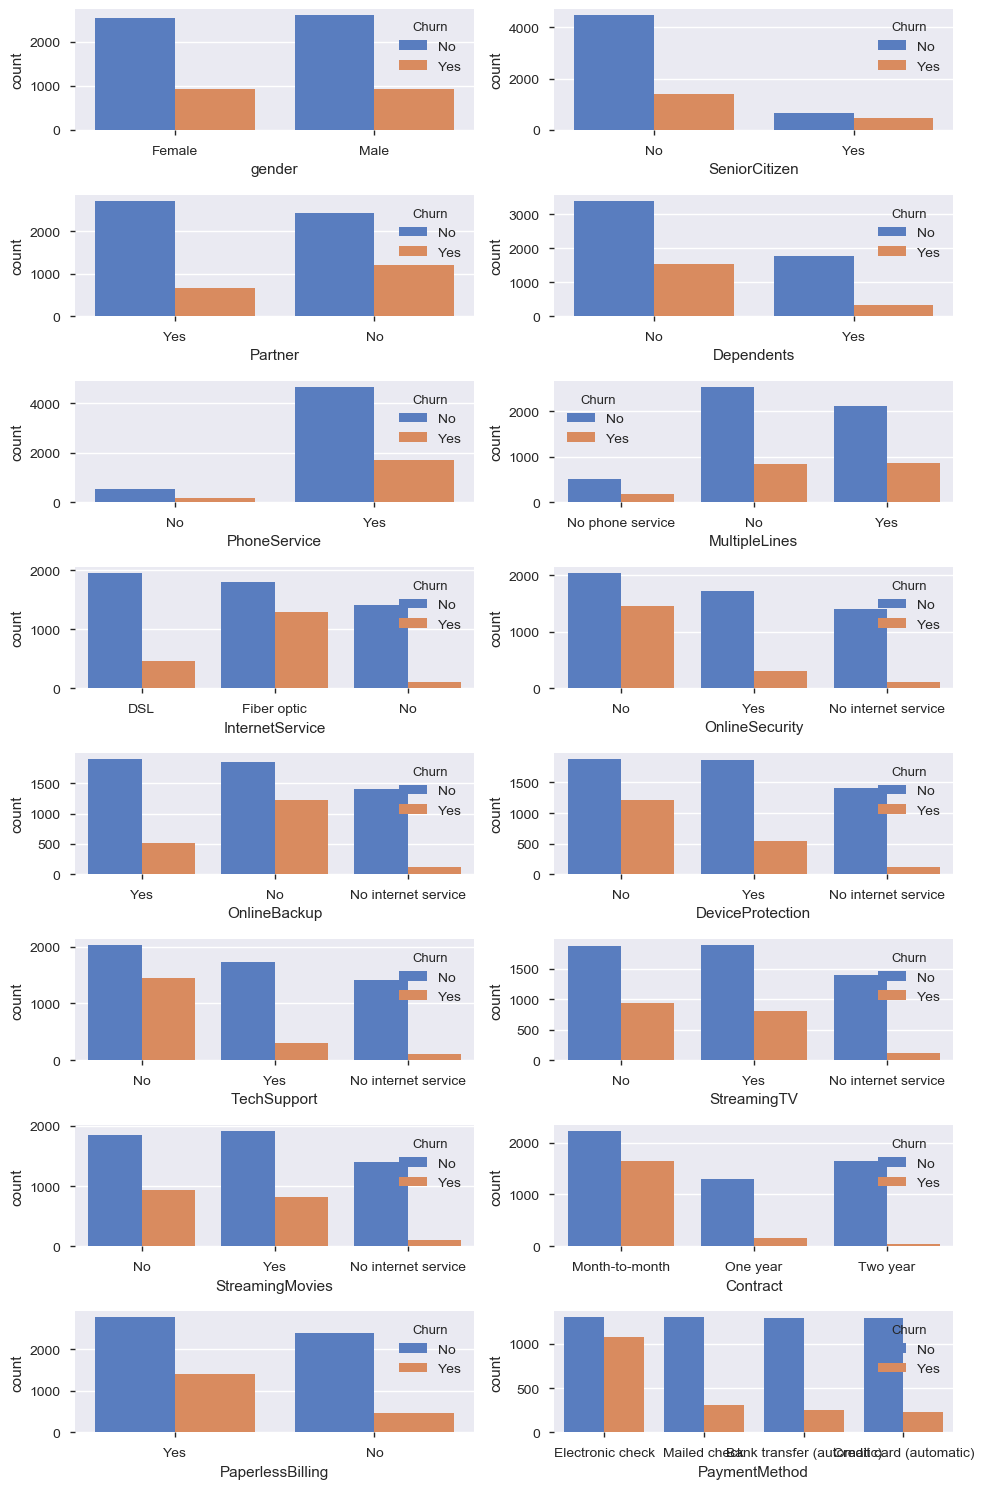

In [10]:
# Display all categoral columns against target variable
col_to_plot = ['gender','SeniorCitizen','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling',
               'PaymentMethod']
f, axes = plt.subplots(round(len(col_to_plot)/2),2, figsize=(10, 15))
for i,x in zip(col_to_plot,axes.flat):
    sns.countplot(data = df ,x = str(i) ,ax = x ,hue = 'Churn'  ,palette="muted")
f.show()
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018A26C8E978>,
      dtype=object)

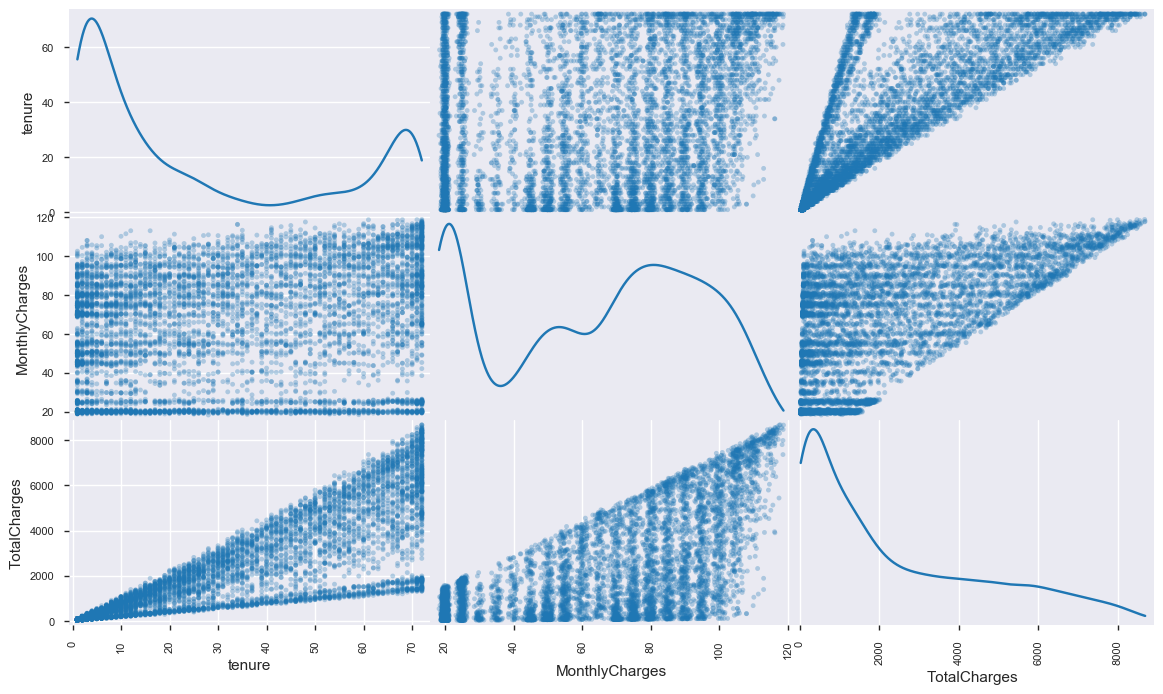

In [11]:
# Display numerical columns asgainst each other
pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

# Feature Engineering

In [12]:
# Derive the new columns from existing ones
df['data_speed'] = df['InternetService'].map({"DSL":1,"Fiber optic": 2,"No":0})
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity'
             ,'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for s in services:
    df[s] = df[s].map({"No internet service":"No","No phone service":"No", "No": 'No', 'Yes': 'Yes',
                      "DSL":"Yes","Fiber optic":"Yes"},na_action='ignore')
services_df = df[services].copy()
services_df = services_df.applymap(lambda x: 1 if x == 'Yes' else 0)
df['num_of_services'] = np.sum(services_df, axis = 1)
df['sustain_score'] = df['Contract'].map({"Month-to-month": 1, "One year": 2, 'Two year': 3},na_action='ignore')

In [13]:
# Prepare data for clustering 
cluser_features = ['SeniorCitizen','Partner', 'Dependents','tenure','MonthlyCharges',
                   'TotalCharges','num_of_services', 'sustain_score','data_speed']
df_cluster = df[cluser_features].copy()
for p in ['SeniorCitizen', 'Partner', 'Dependents']:
    df_cluster[p] = df_cluster[p].map({ "No": 0, 'Yes': 1},na_action='ignore')
    
# Scale features to cluster
from sklearn.preprocessing import StandardScaler
SS = StandardScaler(with_mean=True, with_std=True).fit(df_cluster.values)
scaled_cluster_features = SS.transform(df_cluster.values)
scaled_features_cluster_df = pd.DataFrame(scaled_cluster_features, index=df_cluster.index, columns=df_cluster.columns)
# Features to be clustered
scaled_features_cluster_df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'num_of_services', 'sustain_score', 'data_speed'],
      dtype='object')

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def cluster(clusterer,clustered_df,ctype):
    clusterer.fit(clustered_df)
    preds = clusterer.predict(clustered_df)
    if ctype == 1:
        centers = clusterer.means_
    else:
        centers = clusterer.cluster_centers_ 
    score = silhouette_score(clustered_df, preds)
    
    return [score,centers]


In [28]:
print('clustering using GaussianMixture')
cmax = 0.0
for i in range(2,15):
    clusterer = GaussianMixture(n_components = i, random_state = 40)
    cscore, ccenters = cluster(clusterer,scaled_features_cluster_df,1)
    if cscore > cmax:
        cmax = cscore
        cmaxcenters = ccenters
    print('Number of clusters: ' + str(i) + ' with score: ' + str(cscore))
max_centers = SS.inverse_transform(X=cmaxcenters)
max_centers = pd.DataFrame(np.abs(np.round(max_centers)), columns = cluser_features)
print('cluster with Max score: ' + str(i) + ' with score: ' + str(cmax))
print('Cluster Centers')
max_centers.head()



clustering using GaussianMixture
Number of clusters: 2 with score: 0.23566957428368457
Number of clusters: 3 with score: 0.2363869278819532
Number of clusters: 4 with score: 0.2453773458379687
Number of clusters: 5 with score: 0.23034297571791112
Number of clusters: 6 with score: 0.19610343525687268
Number of clusters: 7 with score: 0.20408185708010623
Number of clusters: 8 with score: 0.17178651823094002
Number of clusters: 9 with score: 0.22669738799818237
Number of clusters: 10 with score: 0.2100273224544588
Number of clusters: 11 with score: 0.21687879265784893
Number of clusters: 12 with score: 0.2104569573299668
Number of clusters: 13 with score: 0.22532787869258641
Number of clusters: 14 with score: 0.2165536648388327
cluster with Max score: 14 with score: 0.2453773458379687
Cluster Centers


,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,num_of_services,sustain_score,data_speed
0,0.0,0.0,0.0,31.0,21.0,666.0,1.0,2.0,0.0
1,0.0,0.0,0.0,10.0,65.0,613.0,4.0,1.0,1.0
2,1.0,1.0,0.0,33.0,83.0,2900.0,5.0,1.0,2.0
3,0.0,1.0,0.0,52.0,83.0,4351.0,6.0,2.0,2.0


In [29]:
print('clustering using Kmeans')
cmax = 0.0
for i in range(2,15):
    clusterer = KMeans(n_clusters = i, random_state = 40)
    cscore, ccenters = cluster(clusterer,scaled_features_cluster_df,2)
    if cscore > cmax:
        cmax = cscore
        cmaxcenters = ccenters
    print('Number of clusters: ' + str(i) + ' with score: ' + str(cscore))
max_centers = SS.inverse_transform(X=cmaxcenters)
max_centers = pd.DataFrame(np.abs(np.round(max_centers)), columns = cluser_features)
print('cluster with Max score: ' + str(i) + ' with score: ' + str(cmax))
print('Cluster Centers')
max_centers.head()

clustering using Kmeans
Number of clusters: 2 with score: 0.26629442394203806
Number of clusters: 3 with score: 0.2689058944442241
Number of clusters: 4 with score: 0.2815320288943176
Number of clusters: 5 with score: 0.2613547221332882
Number of clusters: 6 with score: 0.27306503032952056
Number of clusters: 7 with score: 0.2667844916233723
Number of clusters: 8 with score: 0.28149014274676804
Number of clusters: 9 with score: 0.2891574257061582
Number of clusters: 10 with score: 0.29367095176929725
Number of clusters: 11 with score: 0.27850643244439294
Number of clusters: 12 with score: 0.2982723317584113
Number of clusters: 13 with score: 0.29417412774865626
Number of clusters: 14 with score: 0.30637190065299946
cluster with Max score: 14 with score: 0.30637190065299946
Cluster Centers


,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,num_of_services,sustain_score,data_speed
0,0.0,1.0,0.0,21.0,37.0,826.0,2.0,1.0,1.0
1,0.0,1.0,0.0,24.0,83.0,1997.0,5.0,1.0,2.0
2,1.0,1.0,0.0,57.0,95.0,5431.0,7.0,2.0,2.0
3,0.0,0.0,0.0,54.0,90.0,4811.0,7.0,2.0,2.0
4,0.0,1.0,1.0,63.0,88.0,5558.0,7.0,3.0,1.0


# Modeling

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## preprare data for the model

In [18]:
# Normalize numerical columns
numerics = list(df.select_dtypes(include=[np.number]))
scaled_df = pd.DataFrame(data = df)
scaled_df[numerics] = StandardScaler(with_mean=True, with_std=True).fit_transform(df[numerics])

# Seperate target column from the rest of the dataframe and apply binary transformation
churn = scaled_df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
scaled_df = scaled_df.drop(['Churn','customerID'],axis=1)

# Create dummy variables for categorical features 
features_final = pd.get_dummies(scaled_df)

# Count number of features in the input dataframe
len(features_final.columns)

41

In [19]:
# Split the 'features' and 'churn' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    churn, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5625 samples.
Testing set has 1407 samples.


In [20]:
# Upsample the data to solve imbalance in the target column
print('Before sampling: ',y_train.value_counts())
cols = X_train.columns
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

# convert back to pandas
y_train = pd.Series(y_train)
X_train = pd.DataFrame(X_train, columns = cols)
print('After sampling: ',y_train.value_counts())

Before sampling:  0    4125
1    1500
Name: Churn, dtype: int64
After sampling:  1    4125
0    4125
dtype: int64


In [21]:
# Establish a baseline line naive model
dummy = DummyClassifier().fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

print('Test fscore: ',fbeta_score(y_test, dummy_pred, 2))

Unique predicted labels:  [0 1]
Test score:  0.5074626865671642
Test fscore:  0.4224376731301939


In [22]:
# Initialize the classifier
clf = clf = RandomForestClassifier(random_state=0)

# Create the parameters  to tune
parameters = {'n_estimators': [10,20,40,50,75,100,120, 140],
                           # entropy / gini... 
                           'min_samples_split': [2,6,7,9], 
                           'min_samples_leaf': [1,2,3]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 2)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=10, verbose=10)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

print("Best parameters: ")

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    7.1s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   10.2s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   11.8s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   15.1s
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   17.6s
[Parallel(n_jobs=10)]: Done  65 tasks      | elapsed:   19.6s
[Parallel(n_jobs=10)]: Done  78 tasks      | elapsed:   21.0s
[Parallel(n_jobs=10)]: Done  93 tasks      | elapsed:   25.3s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   28.4s
[Parallel(n_jobs=10)]: 

Best parameters: 


C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Unoptimized model
------
Accuracy score on testing data: 0.7711
F-score on testing data: 0.5075

Optimized Model
------
Final accuracy score on the testing data: 0.7768
Final F-score on the testing data: 0.5849


In [23]:
# Initialize the classifier
clf = SVC(random_state=0)
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
# Create the parameters list to tune
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=10, verbose=10)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:   16.4s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   31.8s
[Parallel(n_jobs=10)]: Done  21 out of  36 | elapsed:   50.2s remaining:   35.8s
[Parallel(n_jobs=10)]: Done  25 out of  36 | elapsed:  1.0min remaining:   26.9s
[Parallel(n_jobs=10)]: Done  29 out of  36 | elapsed:  1.2min remaining:   16.7s
[Parallel(n_jobs=10)]: Done  33 out of  36 | elapsed:  1.8min remaining:    9.5s
[Parallel(n_jobs=10)]: Done  36 out of  36 | elapsed:  6.7min finished
C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default va

Unoptimized model
------
Accuracy score on testing data: 0.7555
F-score on testing data: 0.7033

Optimized Model
------
Final accuracy score on the testing data: 0.7050
Final F-score on the testing data: 0.7302


In [24]:
# use randomized search to randomly search over the parameter dictionary 
# in this step we try to get the best hyperparameter that can achieve best on the CV set
clf = XGBClassifier(random_state = 0)

parameters = {"learning_rate"    : [0.01, 0.05, 0.10, 0.20, 0.30 ] ,
 "max_depth"        : [ 3, 5, 8, 10, 15],
 "min_child_weight" : [ 1, 3, 7],
 "colsample_bytree" : [ 0.3, 0.5, 0.8 ] }

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 2)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring=scorer, n_jobs=10, verbose=10)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

Fitting 3 folds for each of 225 candidates, totalling 675 fits


C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
C:\Users\me250035\AppData\Local\Continuum\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=10)]: Done   5 tasks      | elapsed:    8.5s
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   12.1s
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   17.2s
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   23.0s
[Parallel(n_jobs=10)]: Done  41 tasks      | elapsed:   29.1s
[Parallel(n_jobs=10)]: Don

Unoptimized model
------
Accuracy score on testing data: 0.7882
F-score on testing data: 0.6658

Optimized Model
------
Final accuracy score on the testing data: 0.7683
Final F-score on the testing data: 0.7185


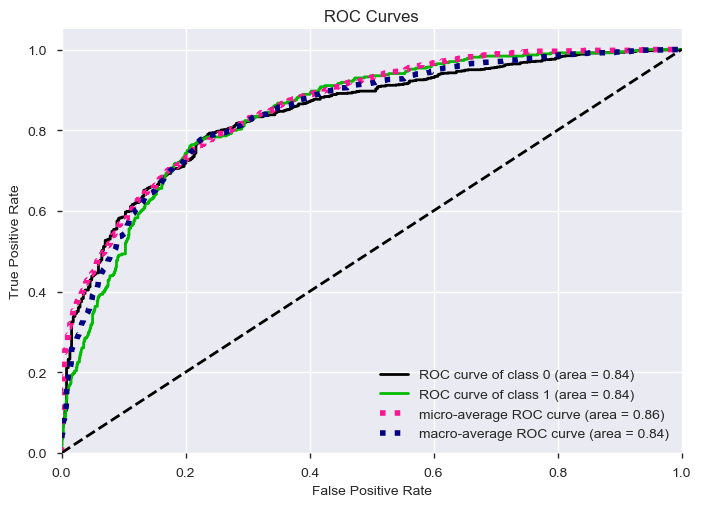

In [38]:
import matplotlib.pyplot as plt
import scikitplot as skplt
probs = best_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs)
plt.show()

In [43]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  
        

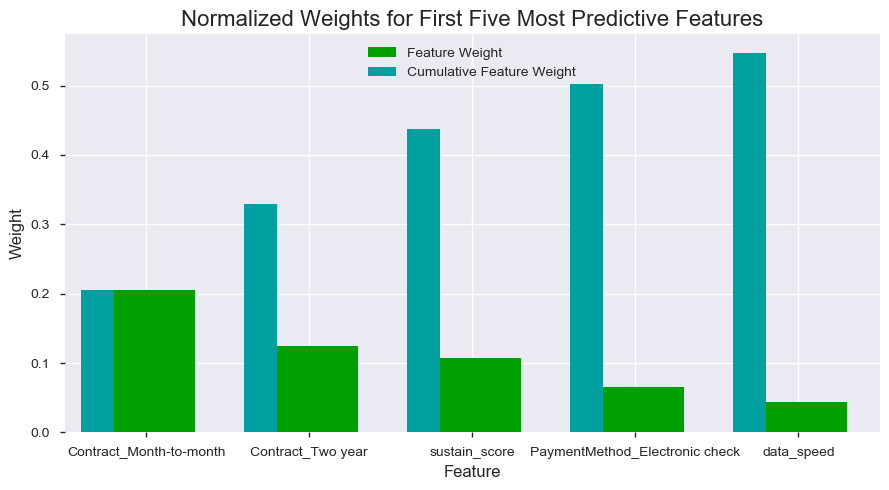

In [32]:
importances = best_clf.feature_importances_

feature_plot(importances, X_train, y_train)